In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn import linear_model
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [4]:
#training set
train=pd.read_csv(r"C:\Users\hp\Documents\Projects\House Price Prediction\Input Data/train.csv")
print(train.head())
print(train.shape)
#print(train.columns)
#print(train.dtypes)
print("columns with the missing value: ",train.columns[train.isnull().any()])
print(train.info())
#print(train.describe)

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008     

In [6]:
train["Fence"].fillna("FenceZ",inplace=True)
Fence_dummy_train=pd.get_dummies(train["Fence"])
train=pd.concat([train,Fence_dummy_train],axis=1)
#MiscFeature
train["MiscFeature"].fillna("B",inplace=True)
MiscFeature_dummy_train=pd.get_dummies(train["MiscFeature"])
train=pd.concat([train,MiscFeature_dummy_train],axis=1)

#BsmtUnfSF
train["BsmtUnfSF"].fillna(train["BsmtUnfSF"].mean(),inplace=True)
#TotalBsmtSF
train["TotalBsmtSF"].fillna(train["TotalBsmtSF"].mean(),inplace=True)
#BsmtFullBath
train["BsmtFullBath"].fillna(train["BsmtFullBath"].mode()[0],inplace=True)
#BsmtHalfBath
train["BsmtHalfBath"].fillna(train["BsmtHalfBath"].mode()[0],inplace=True)
#Functional
train["Functional"].fillna(train["Functional"].mode()[0],inplace=True)
train=pd.concat([train,pd.get_dummies(train["Functional"])],axis=1)
#GarageCars
train["GarageCars"].fillna(train["GarageCars"].mode()[0],inplace=True)
train['BsmtUnfSF'].isna().sum()

0

In [7]:
#training set data manipulation
# train=pd.read_csv("../input/train.csv")
#LotFrontage
mean_LotFrontage_train=train["LotFrontage"].mean()
train["LotFrontage"].fillna(mean_LotFrontage_train,inplace=True)
#Alley
train["Alley"].fillna("Z",inplace=True)
Alley_dummy_train=pd.get_dummies(train["Alley"])
train=pd.concat([train,Alley_dummy_train],axis=1)
#MasVnrType
train["MasVnrType"].fillna("ZZ",inplace=True)
MasVnrType_dummy_train=pd.get_dummies(train["MasVnrType"])
train=pd.concat([train,MasVnrType_dummy_train],axis=1)
#MasVnrArea
mean_MasVnrArea_train=train["MasVnrArea"].mean()
train["MasVnrArea"].fillna(mean_MasVnrArea_train,inplace=True)
#print(train["MasVnrArea"].head())
#BsmtQual
mode_BsmtQual_train=train["BsmtQual"].mode()[0]
train["BsmtQual"].fillna(mode_BsmtQual_train,inplace=True)
BsmtQual_dummy_train=pd.get_dummies(train["BsmtQual"])
train=pd.concat([train,BsmtQual_dummy_train],axis=1)
#BsmtCond
#mode_BsmtCond_train=train["BsmtCond"].mode()[0]
#train["BsmtCond"].fillna(mode_BsmtCond_train,inplace=True)
#BsmtCond_dummy_train=pd.get_dummies(train["BsmtCond"])
#train=pd.concat([train,BsmtCond_dummy_train],axis=1)
#BsmtExposure
mode_BsmtExposure_train=train["BsmtExposure"].mode()[0]
train["BsmtExposure"].fillna(mode_BsmtExposure_train,inplace=True)
train["BsmtExposure"].replace("Gd","Good",inplace=True)
BsmtExposure_dummy_train=pd.get_dummies(train["BsmtExposure"])
train=pd.concat([train,BsmtExposure_dummy_train],axis=1)
#BsmtFinType1
mode_BsmtFinType1_train=train["BsmtFinType1"].mode()[0]
train["BsmtFinType1"].fillna(mode_BsmtFinType1_train,inplace=True)
BsmtFinType1_dummy_train=pd.get_dummies(train["BsmtFinType1"])
train=pd.concat([train,BsmtFinType1_dummy_train],axis=1)
#Electrical
train["Electrical"].fillna(train["Electrical"].mode()[0],inplace=True)
Electrical_dummy_train=pd.get_dummies(train["Electrical"])
train=pd.concat([train,Electrical_dummy_train],axis=1)

#PoolQC
train["PoolQC"].fillna("ZZZ",inplace=True)
PoolQC_dummy_train=pd.get_dummies(train["PoolQC"])
train=pd.concat([train,PoolQC_dummy_train],axis=1)
#Fence
train["Fence"].fillna("FenceZ",inplace=True)
Fence_dummy_train=pd.get_dummies(train["Fence"])
train=pd.concat([train,Fence_dummy_train],axis=1)
#MiscFeature
train["MiscFeature"].fillna("B",inplace=True)
MiscFeature_dummy_train=pd.get_dummies(train["MiscFeature"])
train=pd.concat([train,MiscFeature_dummy_train],axis=1)

#BsmtUnfSF
train["BsmtUnfSF"].fillna(train["BsmtUnfSF"].mean(),inplace=True)
#TotalBsmtSF
train["TotalBsmtSF"].fillna(train["TotalBsmtSF"].mean(),inplace=True)
#BsmtFullBath
train["BsmtFullBath"].fillna(train["BsmtFullBath"].mode()[0],inplace=True)
#BsmtHalfBath
train["BsmtHalfBath"].fillna(train["BsmtHalfBath"].mode()[0],inplace=True)
#Functional
train["Functional"].fillna(train["Functional"].mode()[0],inplace=True)
train=pd.concat([train,pd.get_dummies(train["Functional"])],axis=1)
#GarageCars
train["GarageCars"].fillna(train["GarageCars"].mode()[0],inplace=True)

train.drop(train[["Alley","MasVnrType","BsmtQual","BsmtExposure","BsmtFinType1","Electrical"]],axis=1,inplace=True)
print("columns with the missing value: ",train.columns[train.isnull().any(axis=0)])
print(train.columns)
print(train.info())
print(train["Fence"].head(10))
#print(train["PoolQC"].head(1))
print(train["MiscFeature"].head())

columns with the missing value:  Index(['LotFrontage', 'MasVnrArea', 'BsmtCond', 'BsmtFinType2', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PoolQC'],
      dtype='object')
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       ...
       'Othr', 'Shed', 'TenC', 'Maj1', 'Maj2', 'Min1', 'Min2', 'Mod', 'Sev',
       'Typ'],
      dtype='object', length=142)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 142 entries, Id to Typ
dtypes: float64(3), int64(35), object(37), uint8(67)
memory usage: 951.1+ KB
None
0    FenceZ
1    FenceZ
2    FenceZ
3    FenceZ
4    FenceZ
5     MnPrv
6    FenceZ
7    FenceZ
8    FenceZ
9    FenceZ
Name: Fence, dtype: object
0    B
1    B
2    B
3    B
4    B
Name: MiscFeature, dtype: object


In [9]:
#testing set
test=pd.read_csv(r"C:\Users\hp\Documents\Projects\House Price Prediction\Input Data/test.csv")
print(test.head())
print(test.shape)
#print(test.columns)
#print(test.dtypes)
print("columns with the missing value: ",test.columns[test.isnull().any()])
print(test.info())

     Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities      ...       ScreenPorch PoolArea PoolQC  Fence  \
0         Lvl    AllPub      ...               120        0    NaN  MnPrv   
1         Lvl    AllPub      ...                 0        0    NaN    NaN   
2         Lvl    AllPub      ...                 0        0    NaN  MnPrv   
3         Lvl    AllPub      ...                 0        0    NaN    NaN   
4         HLS    AllPub      ...               144        0    NaN    NaN   

  MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0         NaN   

In [10]:
#testing data manipulation
test=pd.read_csv(r"C:\Users\hp\Documents\Projects\House Price Prediction\Input Data/test.csv")
#LotFrontage
test["LotFrontage"].fillna(test["LotFrontage"].mean(),inplace=True)
#Alley
test["Alley"].fillna("Z",inplace=True)
Alley_dummy_test=pd.get_dummies(test["Alley"])
test=pd.concat([test,Alley_dummy_test],axis=1)
#MasVnrType
test["MasVnrType"].fillna("ZZ",inplace=True)
MasVnrType_dummy_test=pd.get_dummies(test["MasVnrType"])
test=pd.concat([test,MasVnrType_dummy_test],axis=1)
#MasVnrArea
test["MasVnrArea"].fillna(test["MasVnrArea"].mean(),inplace=True)
#BsmtQual
mode_BsmtQual_test=test["BsmtQual"].mode()[0]
test["BsmtQual"].fillna(mode_BsmtQual_test,inplace=True)
BsmtQual_dummy_test=pd.get_dummies(test["BsmtQual"])
test=pd.concat([test,BsmtQual_dummy_test],axis=1)
#BsmtExposure
mode_BsmtExposure_test=test["BsmtExposure"].mode()[0]
test["BsmtExposure"].fillna(mode_BsmtExposure_test,inplace=True)
test["BsmtExposure"].replace("Gd","Good",inplace=True)
BsmtExposure_dummy_test=pd.get_dummies(test["BsmtExposure"])
test=pd.concat([test,BsmtExposure_dummy_test],axis=1)
#BsmtFinType1
mode_BsmtFinType1_test=test["BsmtFinType1"].mode()[0]
test["BsmtFinType1"].fillna(mode_BsmtFinType1_test,inplace=True)
BsmtFinType1_dummy_test=pd.get_dummies(test["BsmtFinType1"])
test=pd.concat([test,BsmtFinType1_dummy_test],axis=1)
#Electrical
test["Electrical"].fillna(test["Electrical"].mode()[0],inplace=True)
Electrical_dummy_test=pd.get_dummies(test["Electrical"])
test=pd.concat([test,Electrical_dummy_test],axis=1)

#PoolQC
test["PoolQC"].fillna("ZZZ",inplace=True)
PoolQC_dummy_test=pd.get_dummies(test["PoolQC"])
test=pd.concat([test,PoolQC_dummy_test],axis=1)
#Fence
test["Fence"].fillna("FenceZ",inplace=True)
Fence_dummy_test=pd.get_dummies(test["Fence"])
test=pd.concat([test,Fence_dummy_test],axis=1)
#MiscFeature
test["MiscFeature"].fillna("ZZZZZ",inplace=True)
MiscFeature_dummy_test=pd.get_dummies(test["MiscFeature"])
test=pd.concat([test,MiscFeature_dummy_test],axis=1)

#BsmtUnfSF
test["BsmtUnfSF"].fillna(test["BsmtUnfSF"].mean(),inplace=True)
#TotalBsmtSF
test["TotalBsmtSF"].fillna(test["TotalBsmtSF"].mean(),inplace=True)
#BsmtFullBath
test["BsmtFullBath"].fillna(test["BsmtFullBath"].mode()[0],inplace=True)
#BsmtHalfBath
test["BsmtHalfBath"].replace(np.nan,test["BsmtHalfBath"].mode()[0],inplace=True)
#Functional
test["Functional"].fillna(test["Functional"].mode()[0],inplace=True)
test=pd.concat([test,pd.get_dummies(test["Functional"])],axis=1)
#GarageCars
test["GarageCars"].fillna(test["GarageCars"].mode()[0],inplace=True)

test.drop(test[["Alley","MasVnrType","BsmtQual","BsmtExposure","BsmtFinType1","Electrical"]],axis=1,inplace=True)
print("columns with the missing value: ",test.columns[test.isnull().any()])
print(test.columns)
print(test.info())

columns with the missing value:  Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtCond',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'Fence',
       'MiscFeature', 'SaleType'],
      dtype='object')
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       ...
       'Gar2', 'Othr', 'Shed', 'Maj1', 'Maj2', 'Min1', 'Min2', 'Mod', 'Sev',
       'Typ'],
      dtype='object', length=117)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 117 entries, Id to Typ
dtypes: float64(11), int64(26), object(37), uint8(43)
memory usage: 904.8+ KB
None


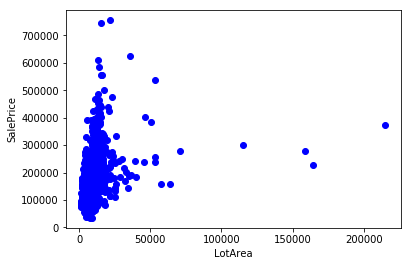

In [11]:
#data visualization of training set
plt.scatter(train.LotArea,train.SalePrice,  color='blue')
plt.xlabel("LotArea")
plt.ylabel("SalePrice")
plt.show()

In [12]:
#training set distribution
train_x=np.asarray(train[['Id','BrkCmn','ZZ','Ex','Fa','Gd','TA','Av','Good','Mn','No','ALQ', 'BLQ', 'GLQ', 'LwQ', 'Rec', 'Unf','FuseA', 'FuseF', 'FuseP', 'SBrkr','BrkFace','None','Stone','MSSubClass','LotArea','OverallQual','OverallCond','YearBuilt','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','TotRmsAbvGrd','Grvl','Pave','Z','LotFrontage','Othr', 'Shed', 'Maj1', 'Maj2', 'Min1', 'Min2', 'Mod', 'Sev','Typ', 'ZZZ', 'GdPrv', 'GdWo', 'MnPrv', 'MnWw', 'Gar2']])
train_y=np.asarray(train[['SalePrice']])
print("shape of training set: ",train_x.shape,train_y.shape)

KeyError: "['ZZ' 'Good' 'Z' 'ZZZ'] not in index"

In [13]:
#testing set
test_x=np.asarray(test[['Id','BrkCmn','ZZ','Ex','Fa','Gd','TA','Av','Good','Mn','No','ALQ', 'BLQ', 'GLQ', 'LwQ', 'Rec', 'Unf','FuseA', 'FuseF', 'FuseP', 'SBrkr','BrkFace','None','Stone','MSSubClass','LotArea','OverallQual','OverallCond','YearBuilt','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','TotRmsAbvGrd','Grvl','Pave','Z','LotFrontage','Othr', 'Shed', 'Maj1', 'Maj2', 'Min1', 'Min2', 'Mod', 'Sev','Typ', 'ZZZ', 'GdPrv', 'GdWo', 'MnPrv', 'MnWw', 'Gar2']])
print("shape of test set used: ",test_x.shape)

shape of test set used:  (1459, 55)


In [14]:
#training of model
reg=linear_model.LinearRegression()
reg.fit(train_x,train_y)

NameError: name 'train_x' is not defined

In [15]:
#prediction of the test set data
yhat=reg.predict(test_x)
yhat[0:5]

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [16]:
sub_df = pd.read_csv(r"C:\Users\hp\Documents\Projects\House Price Prediction\Input Data/sample_submission.csv")
sub_df.SalePrice = yhat
sub_df.to_csv("C:\Users\hp\Documents\Projects\House Price Prediction\Output\submission.csv", index=False)

FileNotFoundError: File b'../input/sample_submission.csv' does not exist